In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the data
df = pd.read_csv('/content/bcancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
rows, cols = df.shape
print(f'The dataset has {rows} rows and {cols} columns')

The dataset has 569 rows and 31 columns


## Data Cleaning

In [8]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
df = df.drop('Unnamed: 32', axis=1)
ids = df.drop('id', axis=1)
df = df.drop('id', axis=1)

In [23]:
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


## Univariate Analysis

In [11]:
#Check for unique values
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

id has 569 unique values
diagnosis has 2 unique values
radius_mean has 456 unique values
texture_mean has 479 unique values
perimeter_mean has 522 unique values
area_mean has 539 unique values
smoothness_mean has 474 unique values
compactness_mean has 537 unique values
concavity_mean has 537 unique values
concave points_mean has 542 unique values
symmetry_mean has 432 unique values
fractal_dimension_mean has 499 unique values
radius_se has 540 unique values
texture_se has 519 unique values
perimeter_se has 533 unique values
area_se has 528 unique values
smoothness_se has 547 unique values
compactness_se has 541 unique values
concavity_se has 533 unique values
concave points_se has 507 unique values
symmetry_se has 498 unique values
fractal_dimension_se has 545 unique values
radius_worst has 457 unique values
texture_worst has 511 unique values
perimeter_worst has 514 unique values
area_worst has 544 unique values
smoothness_worst has 411 unique values
compactness_worst has 529 unique v

In [24]:
#Describe numerical features
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


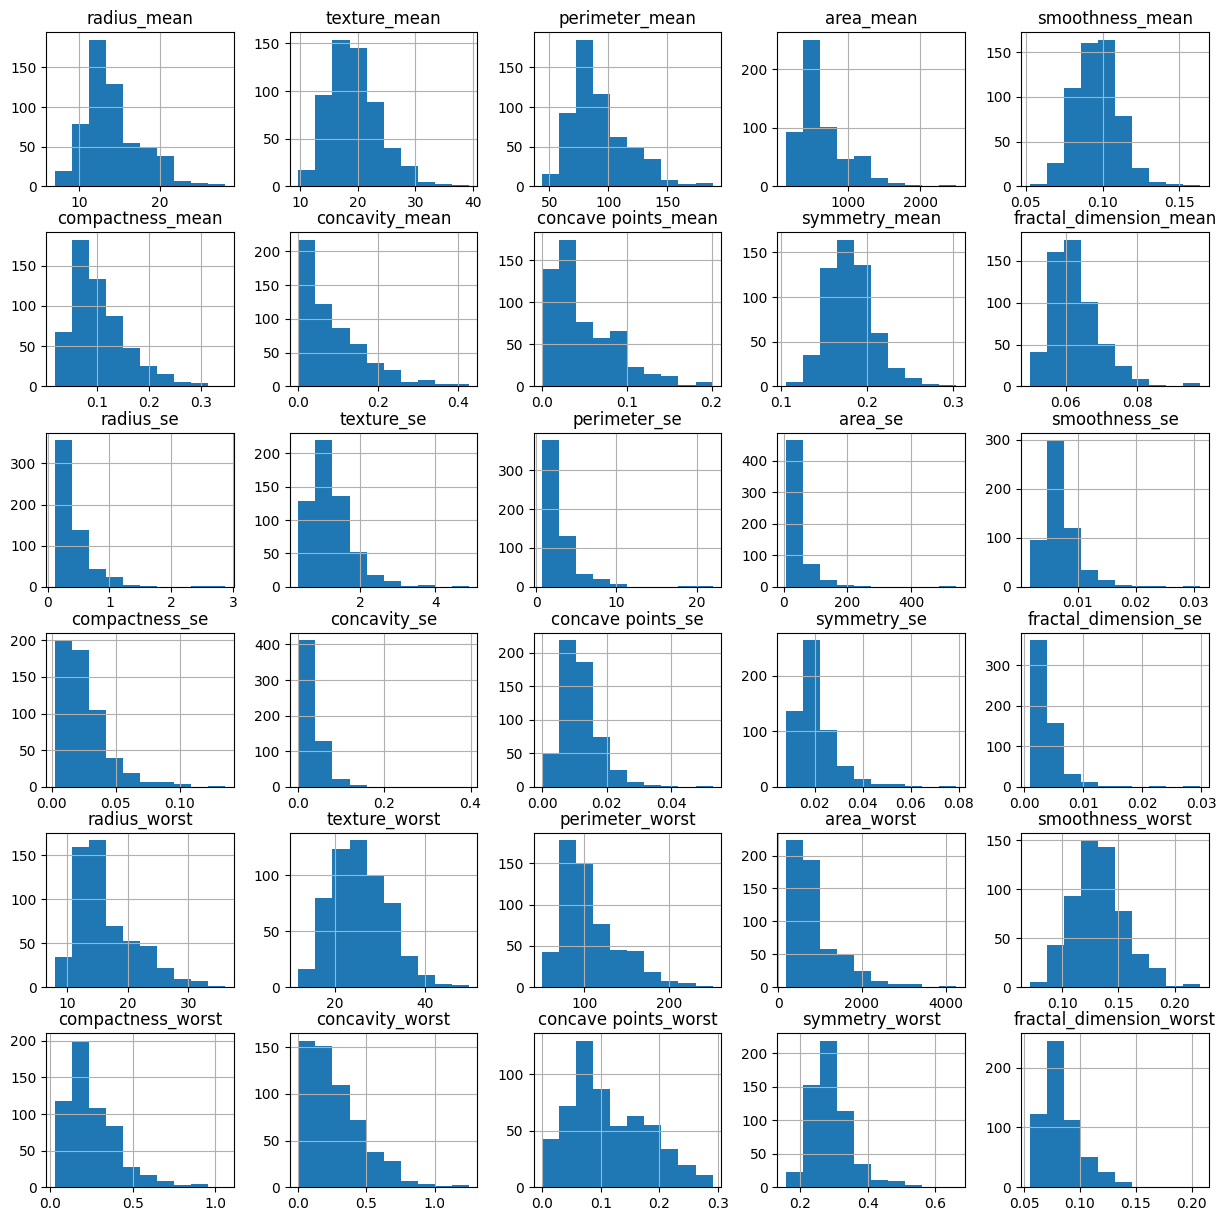

In [27]:
#Plot histograms for numerical features
df.hist(figsize=(15,15))
plt.show()

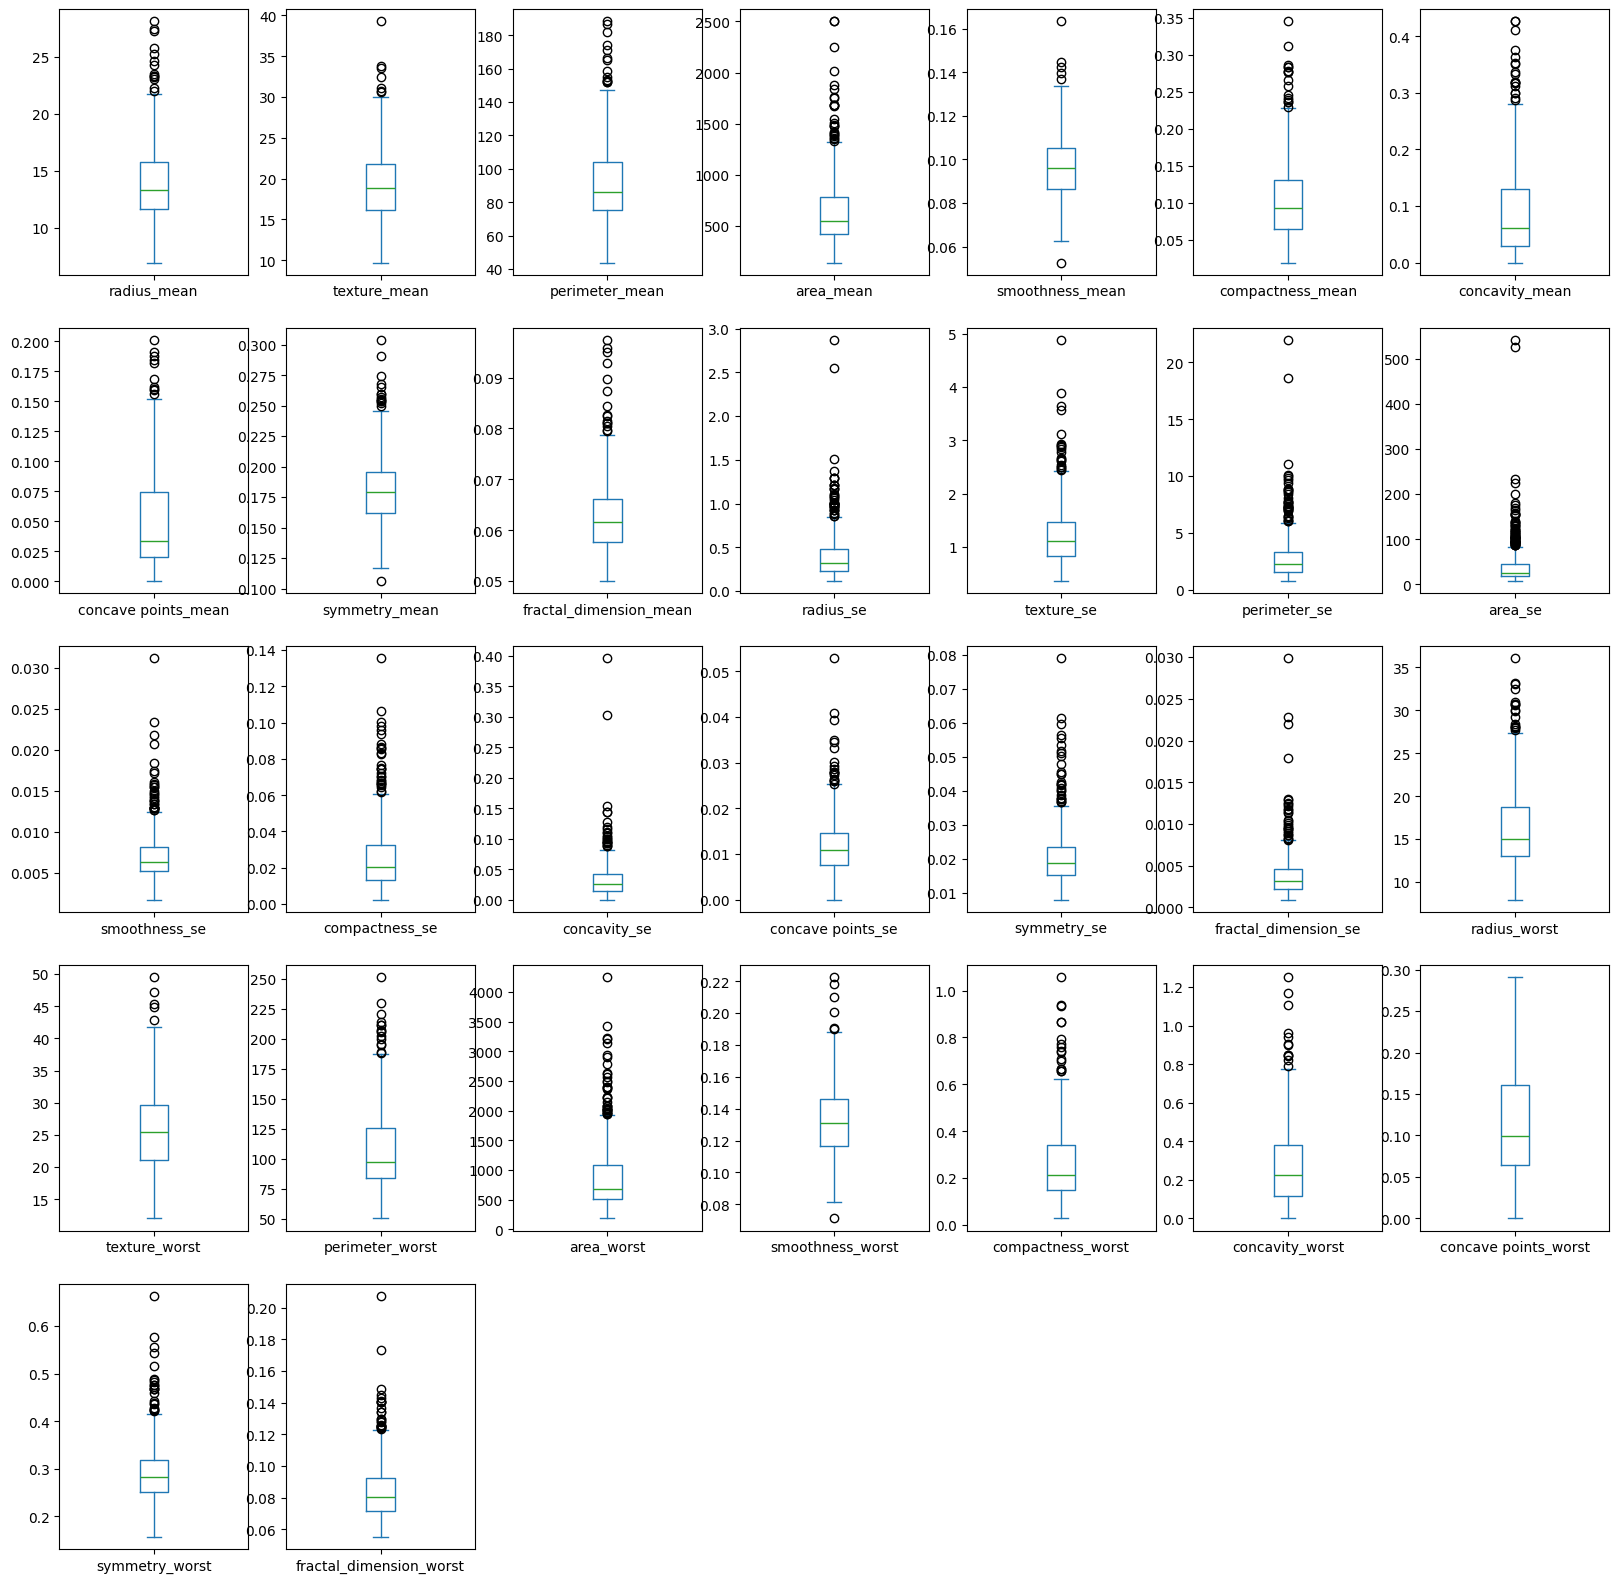

In [28]:
#Plot boxplots for numerical features
df.plot(kind='box', subplots=True, layout=(5,7), figsize=(20,20))
plt.show()

In [36]:
#Calculate the skewness for each numerical feature
numeric_df = df.select_dtypes(include=['number'])
numeric_df.skew()

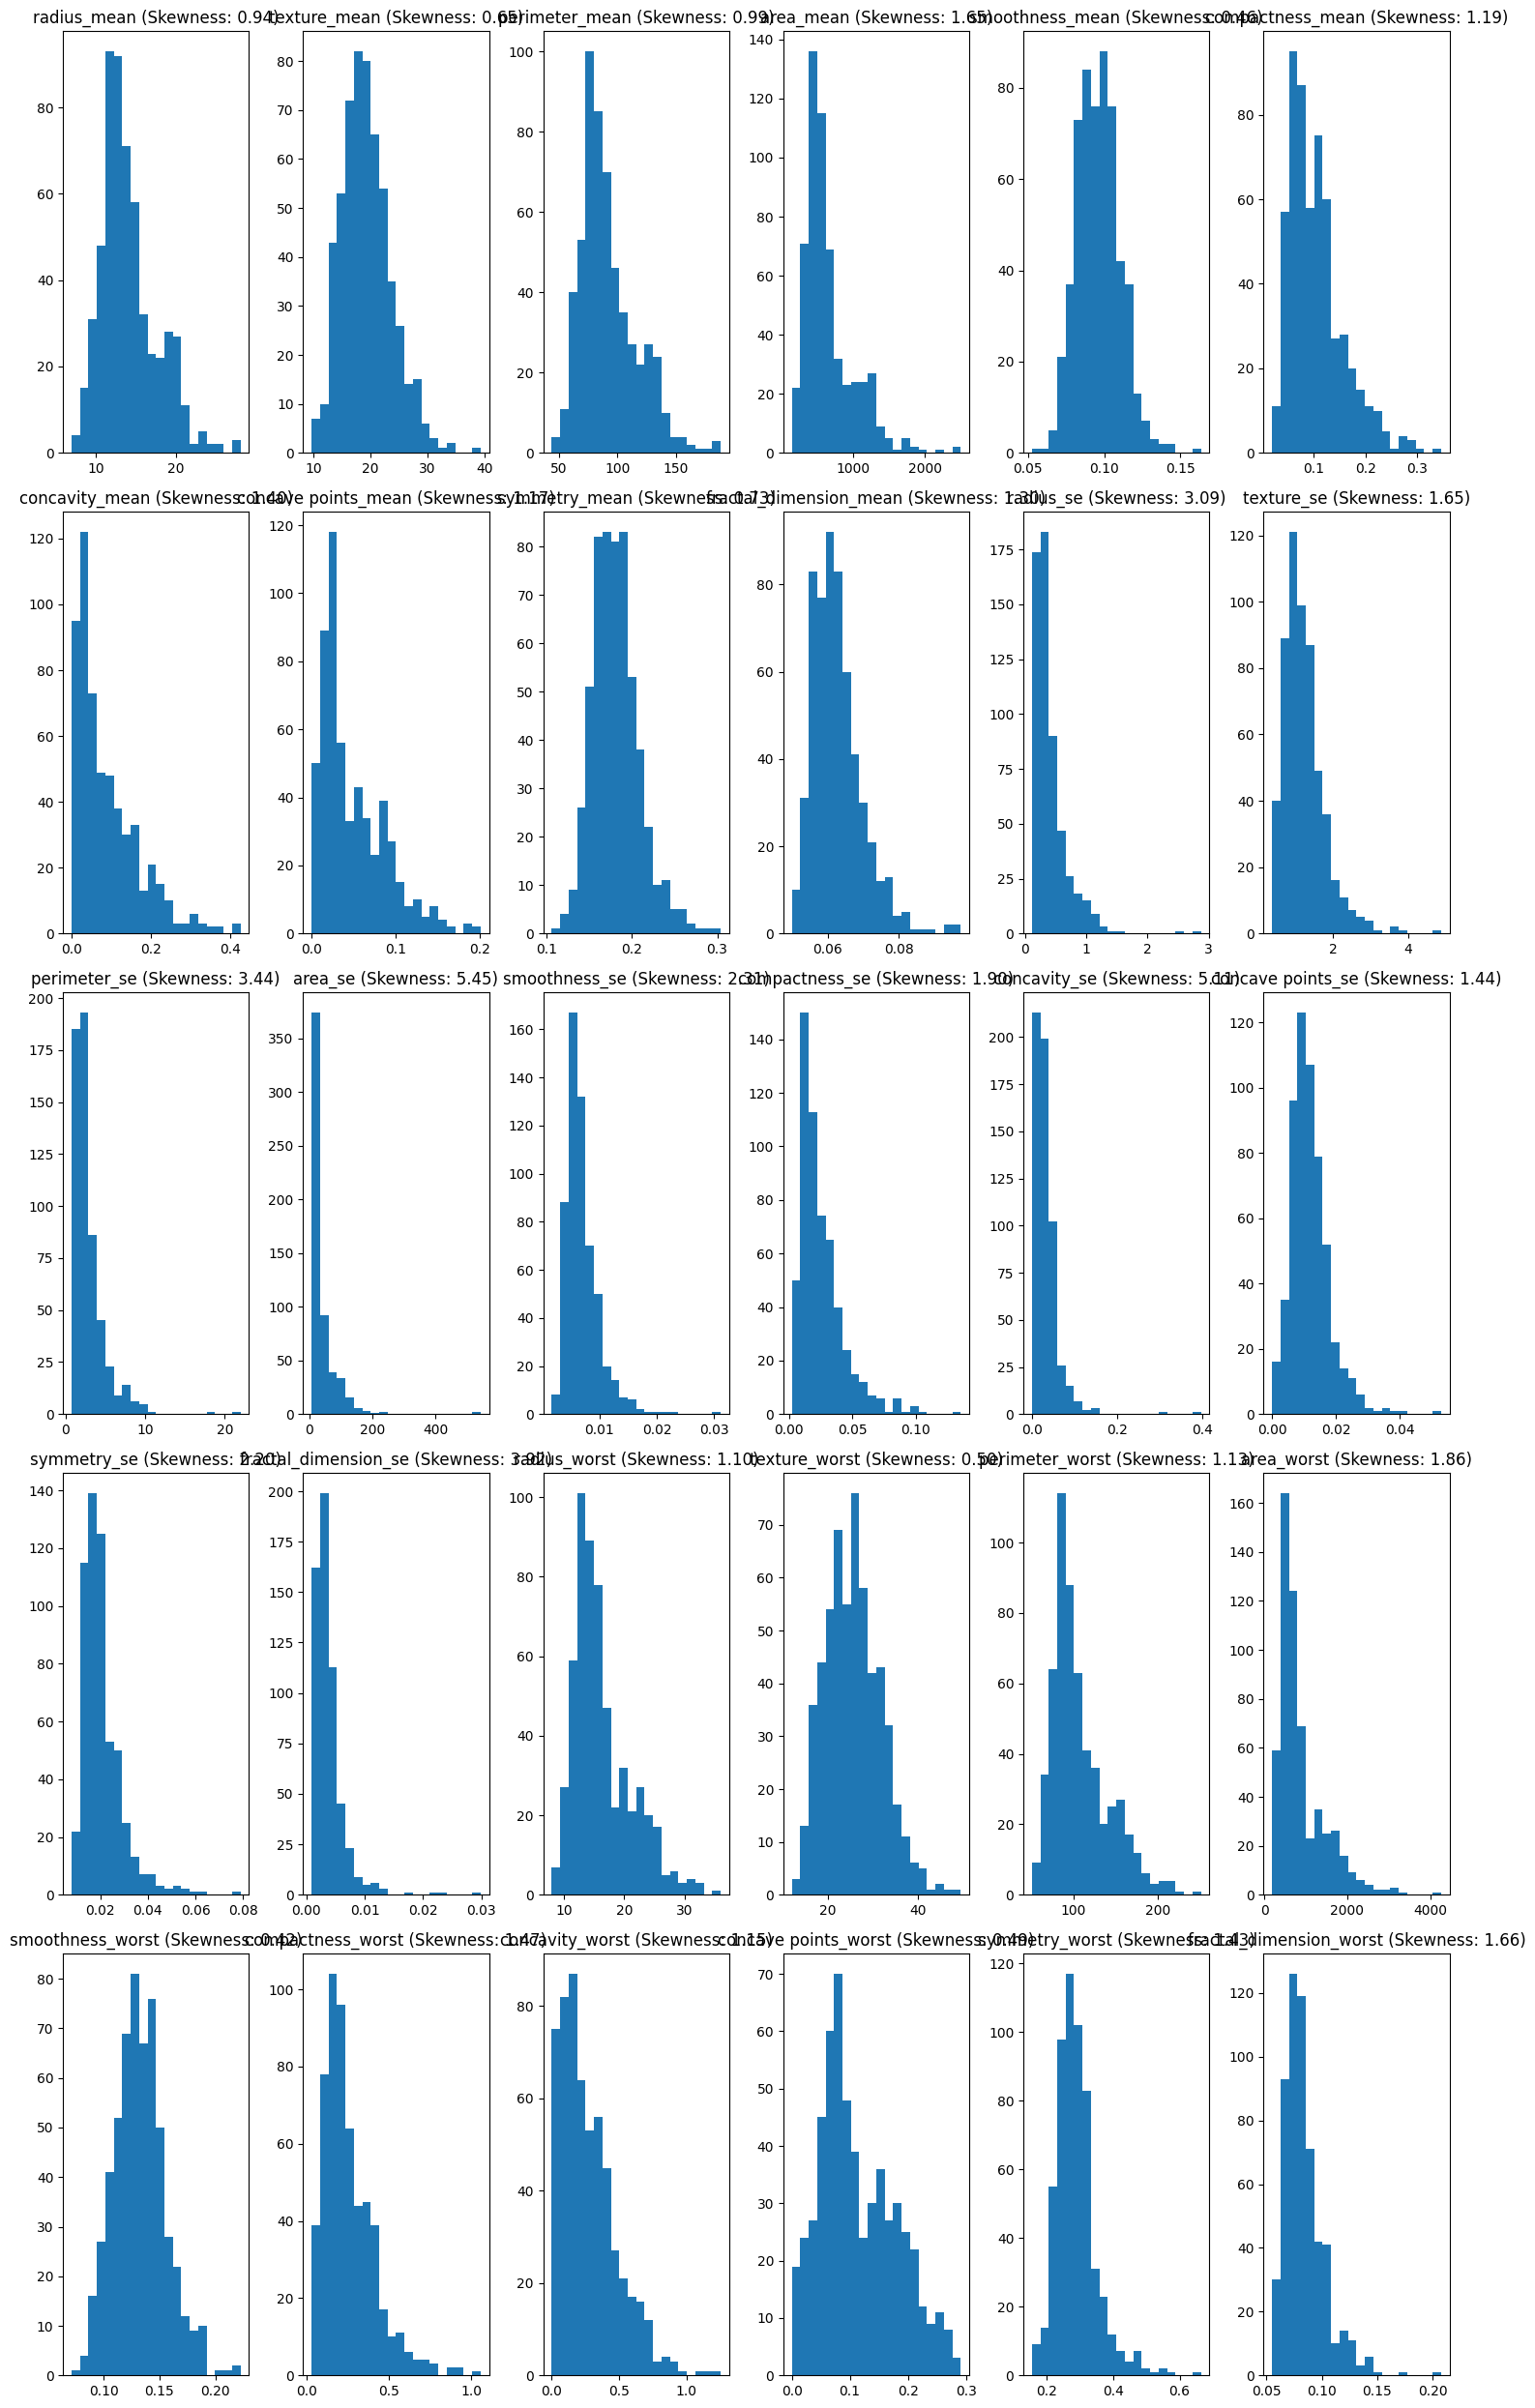

In [38]:
skewness = numeric_df.skew()

# Create subplots
num_plots = len(skewness)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot skewness for each column
for i, col in enumerate(skewness.index):
    ax = axes[i]
    ax.hist(numeric_df[col], bins=20)
    ax.set_title(f'{col} (Skewness: {skewness[col]:.2f})')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate Analysis


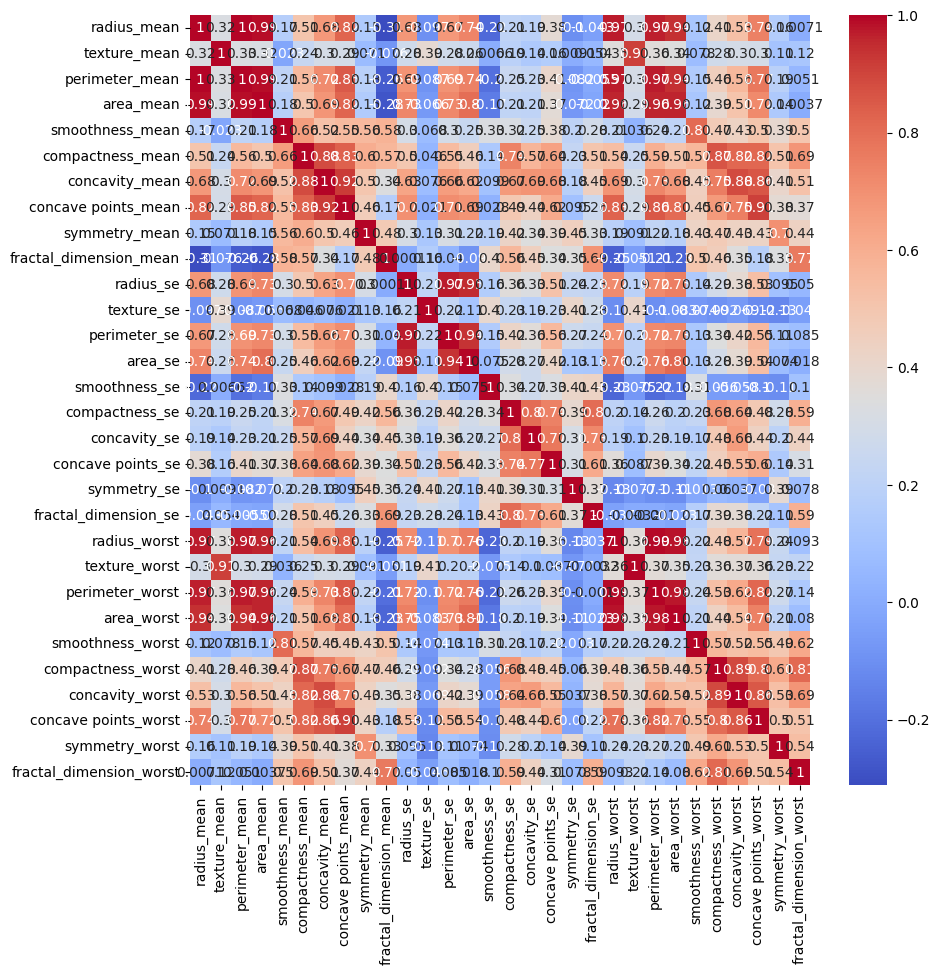

In [41]:
# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

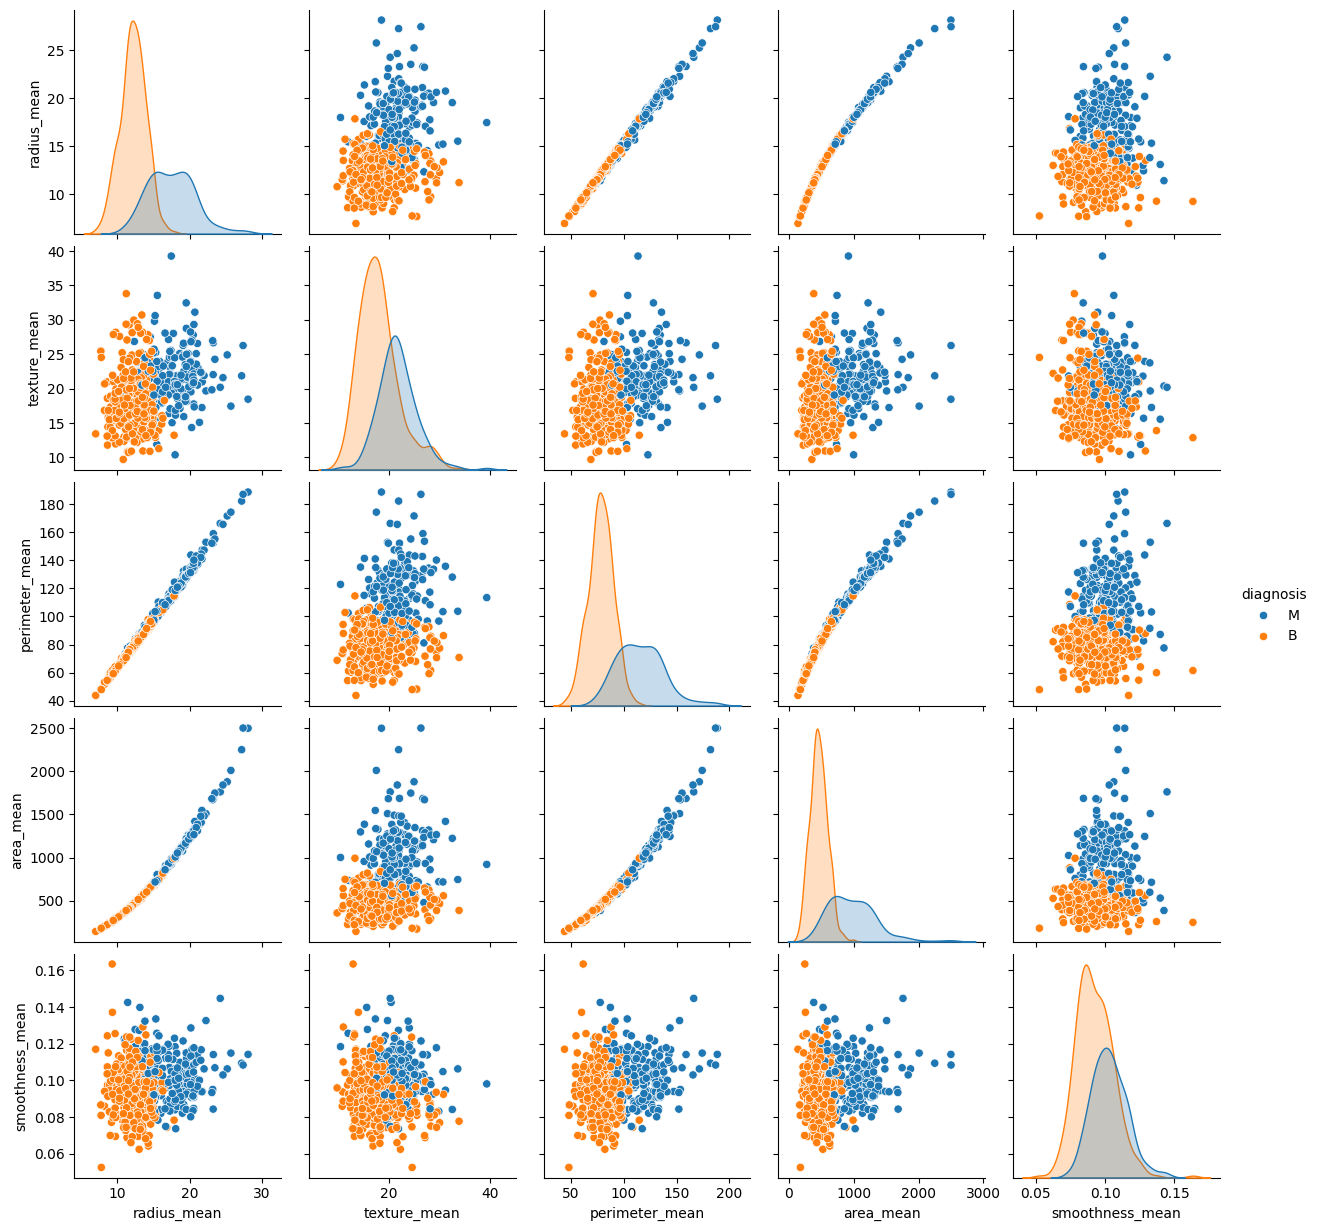

In [42]:
# Scatter plot for selected features
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']], hue='diagnosis')
plt.show()

## Multivariate Analysis

In [44]:
# Convert diagnosis into numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

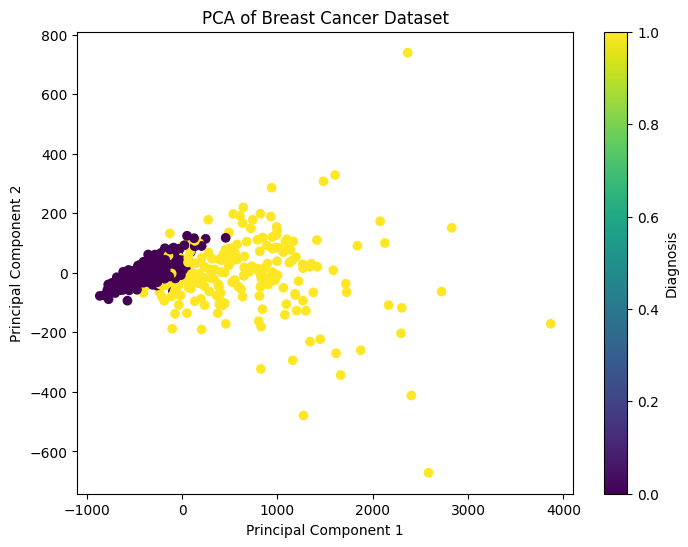

In [46]:
# Principal Component Analysis (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
x = df.drop('diagnosis', axis=1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)


# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['diagnosis'].astype('category').cat.codes)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label="Diagnosis")
plt.show()

In [48]:
# Explained variance ratio
print("Explained variance ratio: ",pca.explained_variance_ratio_)
print('Total explained variance ratio: ', sum(pca.explained_variance_ratio_))

Explained variance ratio:  [0.98204467 0.01617649]
Total explained variance ratio:  0.9982211613741726


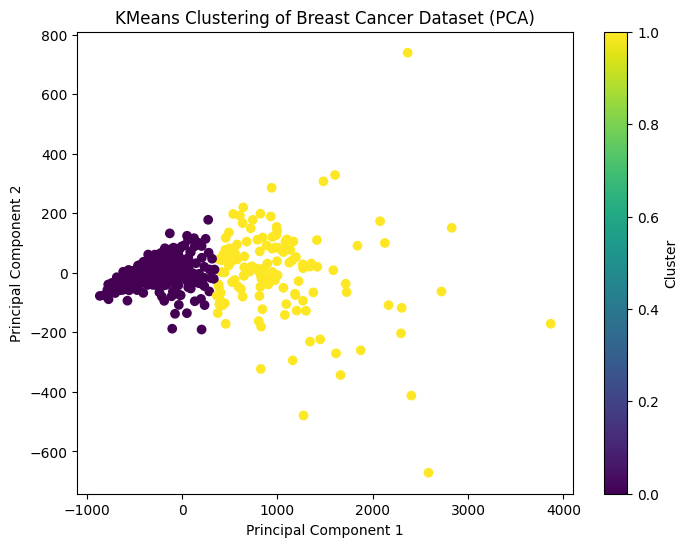

In [49]:
from sklearn.cluster import KMeans

k = 2

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(finalDf[['principal component 1', 'principal component 2']])

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the DataFrame
finalDf['cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Breast Cancer Dataset (PCA)')
plt.colorbar(label="Cluster")
plt.show()